Step 1: Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import itertools
from IPython.display import Image  
from sklearn import tree
from scipy.stats import levene, shapiro, f_oneway
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
np.random.seed(1234)

C:\Users\Harshitha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Step 2: Read the data as a data frame

In [3]:
df=pd.read_csv("D:/D/Great Learning/Project 3/bank-full (1).csv")

Step 3: Perform basic EDA which should include the following and print out your insights at every step. 

a. Shape of the data 

b. Data type of each attribute 

c. Checking the presence of missing values 

d. 5 Point summary of numerical attributes 

e. Checking the presence of outliers 

In [4]:
#a. Shape of the data
print("Shape of data: ", df.shape)

Shape of data:  (45211, 17)


In [5]:
#b. Data type of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#c. Checking the presence of missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Inference: There are no missing values in the dataset. However there are "Unknown" categories in several variables. 

In [7]:
#d. 5 Point summary of numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Outlier Analysis

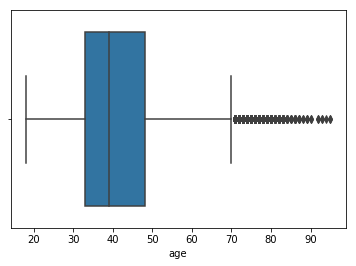

In [8]:
ax = sns.boxplot(x=df["age"])

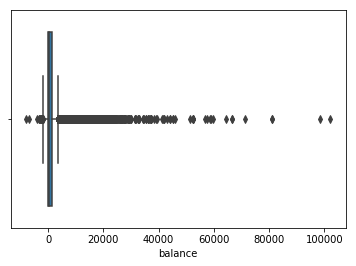

In [9]:
ax = sns.boxplot(x=df["balance"])

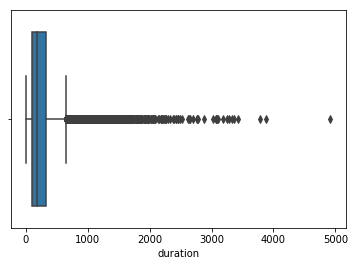

In [10]:
ax = sns.boxplot(x=df["duration"])

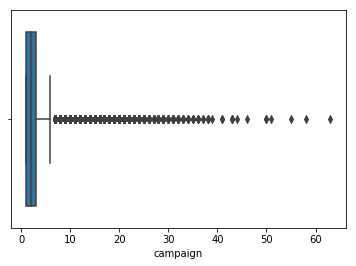

In [11]:
ax = sns.boxplot(x=df["campaign"])

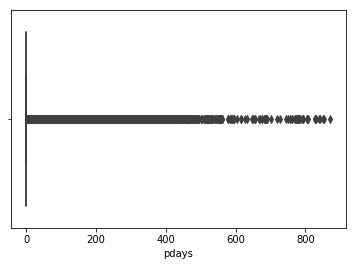

In [12]:
ax = sns.boxplot(x=df["pdays"])

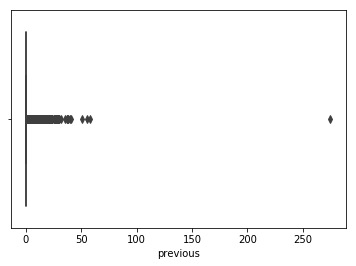

In [13]:
ax = sns.boxplot(x=df["previous"])

Inference: Observed no outliers in age variable and outliers in other variables are looking acceptable. No need to remove any outliers

Exploratory Data Analysis

Analysis on Categorical variables distribution

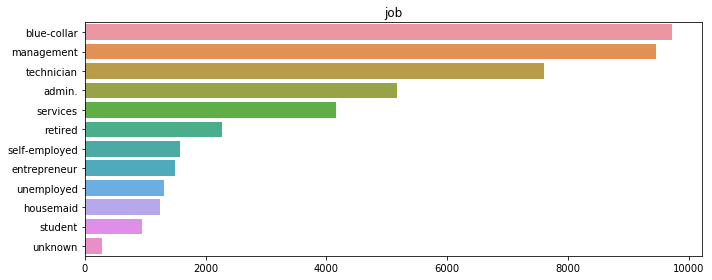

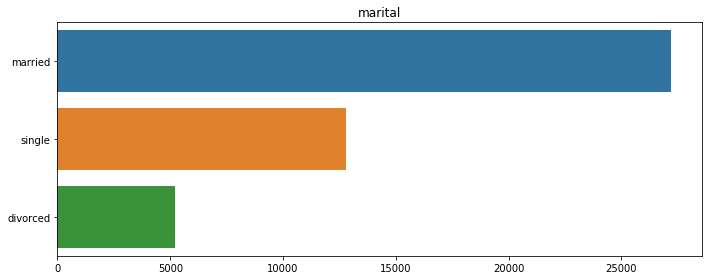

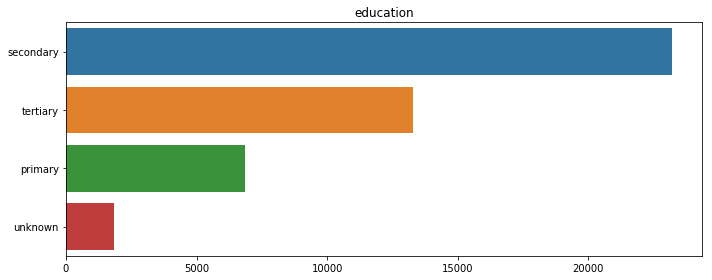

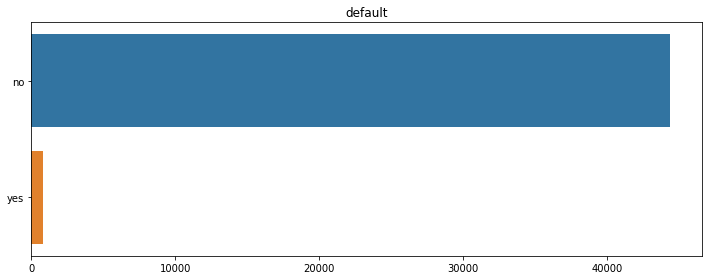

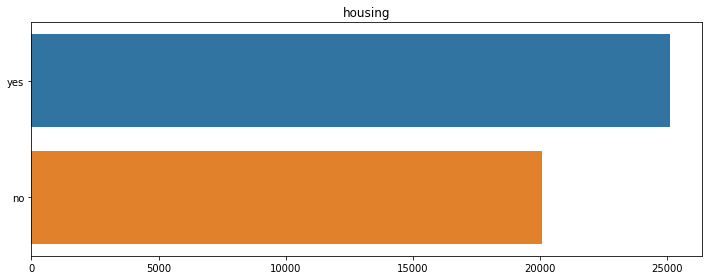

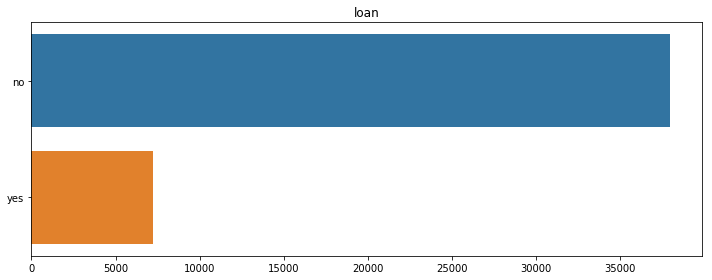

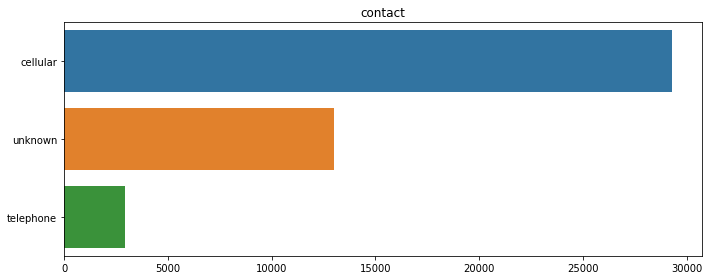

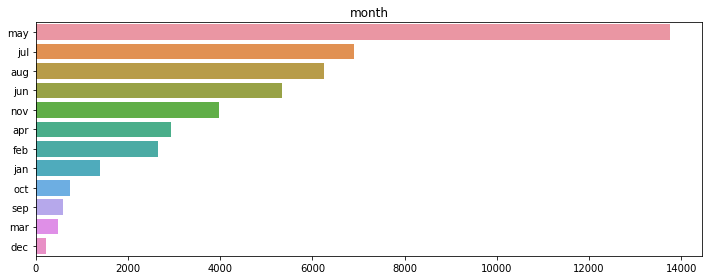

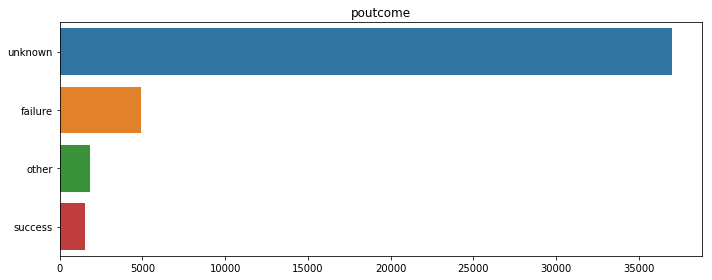

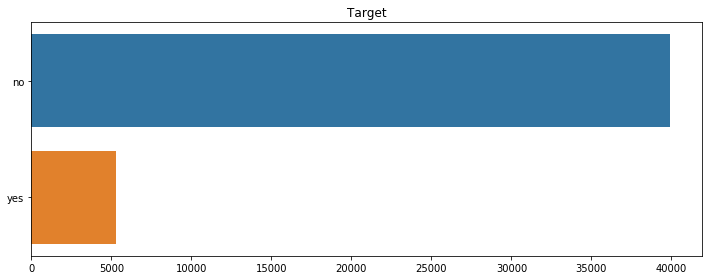

In [14]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','Target']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

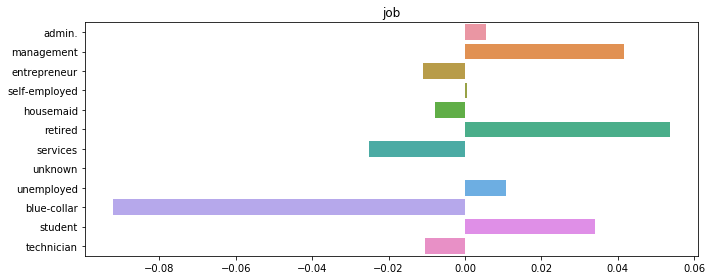

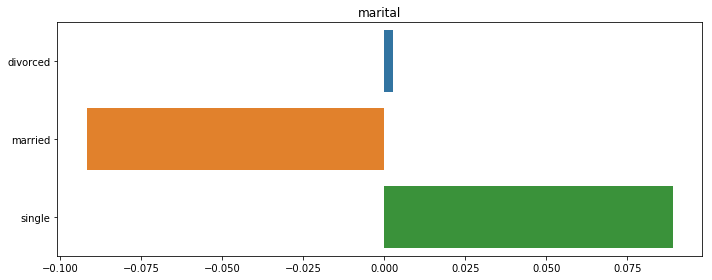

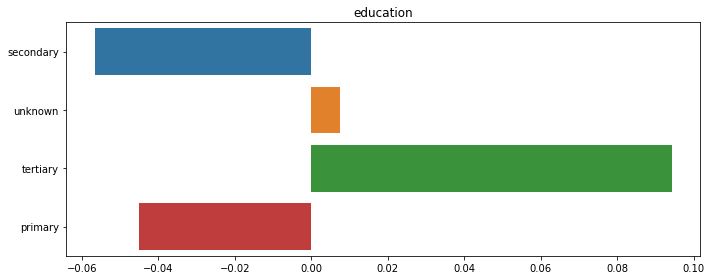

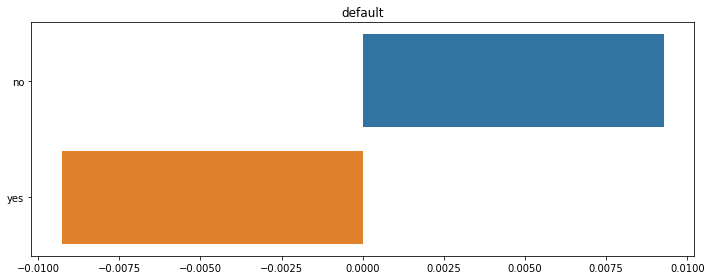

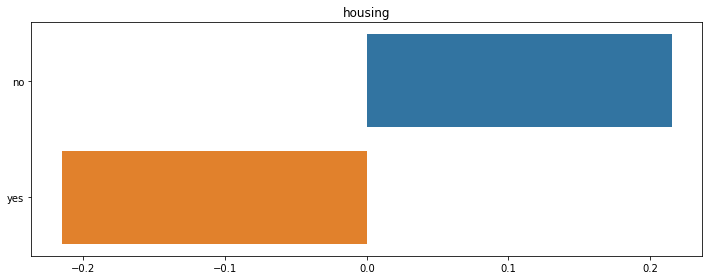

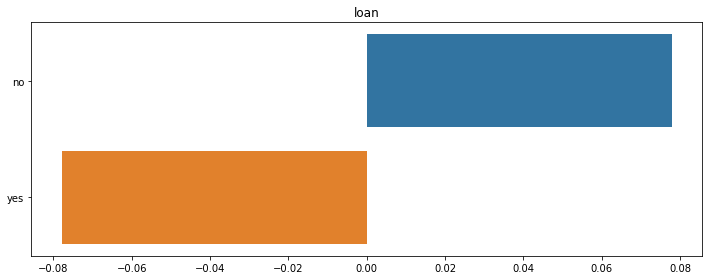

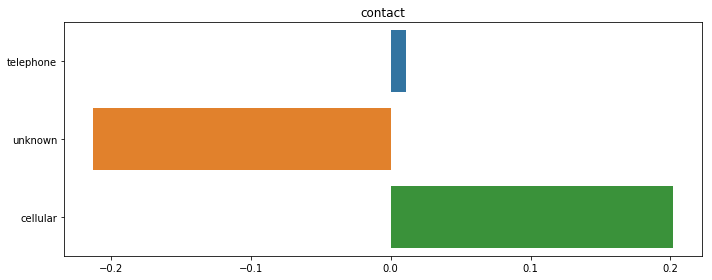

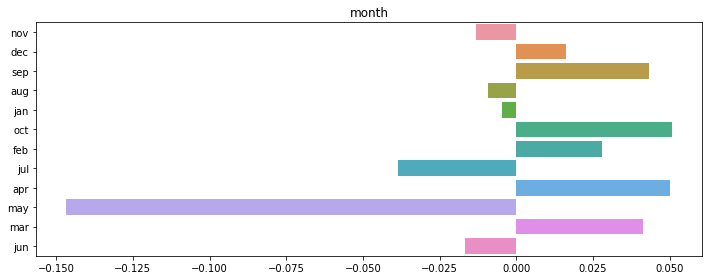

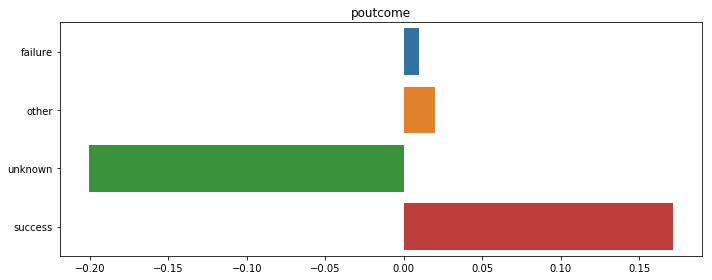

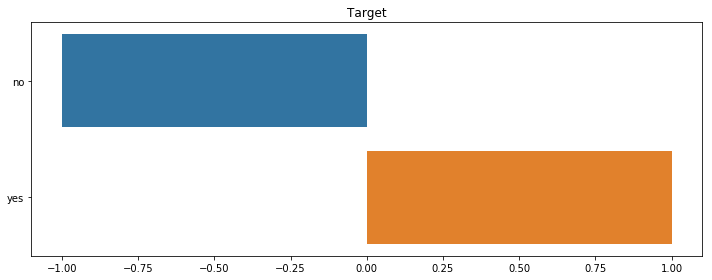

In [15]:

categorcial_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','Target']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.Target.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.Target.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.Target.values == 'yes').sum()
    freq_neg = (df.Target.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

"Unknown" data observed in some of the columns. Considering this as null values, working further to fill/remove missing values

In [16]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [17]:
cross_tab(df,'job','education')

,tertiary,secondary,unknown,primary
job,,,,
admin.,572,4219,171,209
blue-collar,149,5371,454,3758
entrepreneur,686,542,76,183
housemaid,173,395,45,627
management,7801,1121,242,294
retired,366,984,119,795
self-employed,833,577,39,130
services,202,3457,150,345
student,223,508,163,44


In [18]:
df['job'][df['age']>60].value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

In [19]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'

In [20]:
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='admin.'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='blue-collar'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='entrepreneur'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'primary'
df.loc[(df['education']=='unknown') & (df['job']=='self-employed'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='student'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='technician'), 'education'] = 'secondary'

In [21]:
cross_tab(df,'job','education')

,tertiary,secondary,unknown,primary
admin.,572,4390,0.0,209
blue-collar,149,5825,0.0,3758
entrepreneur,762,542,0.0,183
housemaid,173,395,0.0,672
management,8043,1121,0.0,294
retired,371,989,130.0,796
self-employed,872,577,0.0,130
services,202,3607,0.0,345
student,223,671,0.0,44
technician,1968,5471,0.0,158


In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
df.loc[(df['Target']=='yes'), 'Target'] = 1
df.loc[(df['Target']=='no'), 'Target'] = 0

df.loc[(df['default']=='yes'), 'default'] = 1
df.loc[(df['default']=='no'), 'default'] = 0

df.loc[(df['housing']=='yes'), 'housing'] = 1
df.loc[(df['housing']=='no'), 'housing'] = 0

df.loc[(df['loan']=='yes'), 'loan'] = 1
df.loc[(df['loan']=='no'), 'loan'] = 0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null int64
balance      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null int64
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [25]:
df["Target"] = df["Target"].astype("category")
df["loan"] = df["loan"].astype("category")
df["housing"] = df["housing"].astype("category")

In [26]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2286
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           266
Name: job, dtype: int64

In [27]:
df.loc[(df['job']=='blue-collar'), 'job'] = 1
df.loc[(df['job']=='management'), 'job'] = 2
df.loc[(df['job']=='technician'), 'job'] = 3
df.loc[(df['job']=='admin.'), 'job'] = 4
df.loc[(df['job']=='services'), 'job'] = 5
df.loc[(df['job']=='retired'), 'job'] = 6
df.loc[(df['job']=='self-employed'), 'job'] = 7
df.loc[(df['job']=='entrepreneur'), 'job'] = 8
df.loc[(df['job']=='unemployed'), 'job'] = 9
df.loc[(df['job']=='housemaid'), 'job'] = 10
df.loc[(df['job']=='student'), 'job'] = 11
df.loc[(df['job']=='unknown'), 'job'] = 12

In [28]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [29]:
df.loc[(df['marital']=='married'), 'marital'] = 1
df.loc[(df['marital']=='single'), 'marital'] = 2
df.loc[(df['marital']=='divorced'), 'marital'] = 3

In [30]:
df['education'].value_counts()

secondary    24382
tertiary     13658
primary       6896
unknown        275
Name: education, dtype: int64

In [31]:
df.loc[(df['education']=='secondary'), 'education'] = 1
df.loc[(df['education']=='tertiary'), 'education'] = 1
df.loc[(df['education']=='primary'), 'education'] = 1
df.loc[(df['education']=='unknown'), 'education'] = 1

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int64
marital      45211 non-null int64
education    45211 non-null int64
default      45211 non-null int64
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null category
dtypes: category(3), int64(11), object(3)
memory usage: 5.0+ MB


In [33]:
df = df.drop(['contact', 'poutcome', 'month', 'pdays', 'balance'], axis = 1)

In [34]:
df.head()

,age,job,marital,education,default,housing,loan,day,duration,campaign,previous,Target
0,58,2,1,1,0,1,0,5,261,1,0,0
1,44,3,2,1,0,1,0,5,151,1,0,0
2,33,8,1,1,0,1,1,5,76,1,0,0
3,47,1,1,1,0,1,0,5,92,1,0,0
4,33,12,2,1,0,0,0,5,198,1,0,0


In [35]:
df["job"] = df["job"].astype("category")
df["marital"] = df["marital"].astype("category")
df["education"] = df["education"].astype("category")
df["default"] = df["default"].astype("category")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
housing      45211 non-null category
loan         45211 non-null category
day          45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
previous     45211 non-null int64
Target       45211 non-null category
dtypes: category(7), int64(5)
memory usage: 2.0 MB


In [37]:
df["age"] = np.log1p(df["age"])
df["day"] = np.log1p(df["day"])
df["duration"] = np.log1p(df["duration"])
df["campaign"] = np.log1p(df["campaign"])

In [38]:
df.head()

,age,job,marital,education,default,housing,loan,day,duration,campaign,previous,Target
0,4.077537,2,1,1,0,1,0,1.791759,5.568345,0.693147,0,0
1,3.806662,3,2,1,0,1,0,1.791759,5.023881,0.693147,0,0
2,3.526361,8,1,1,0,1,1,1.791759,4.343805,0.693147,0,0
3,3.871201,1,1,1,0,1,0,1.791759,4.532599,0.693147,0,0
4,3.526361,12,2,1,0,0,0,1.791759,5.293305,0.693147,0,0


In [39]:
df["default"] = df["default"].astype("category")

In [40]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
day          0
duration     0
campaign     0
previous     0
Target       0
dtype: int64

In [41]:
Y = df['Target']

In [42]:
X = df.drop(['Target'], axis =1)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=100)

In [44]:
X_train.shape

(31647, 11)

Classification - Base Models

In [45]:
logmodel = LogisticRegression()

In [46]:
Logistic_Reg_Model = logmodel.fit(X_train,Y_train)

In [47]:
Logistic_Reg_Model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
predictions = Logistic_Reg_Model.predict(X_test)

In [49]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94     11985
          1       0.54      0.18      0.27      1579

avg / total       0.86      0.89      0.86     13564



In [51]:
confusion_matrix(Y_test,predictions)

array([[11743,   242],
       [ 1293,   286]], dtype=int64)

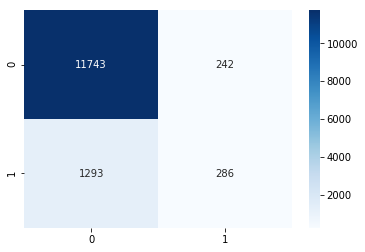

In [52]:
sns.heatmap(confusion_matrix(Y_test,predictions), annot=True, cmap='Blues',fmt='g')

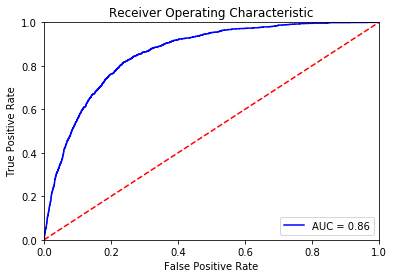

In [53]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = Logistic_Reg_Model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
Logistic_Accuracy = accuracy_score(Y_test,predictions)
Logistic_Accuracy

0.8868327926865232

In [55]:
Logistic_Gini = 2*roc_auc - 1
Logistic_Gini

0.7177299151911176

In [56]:
Logistic_AUC = roc_auc
Logistic_AUC

0.8588649575955588

In [57]:
Naive = GaussianNB()

In [58]:
Naive_model = Naive.fit(X_train,Y_train)

In [59]:
Naive_model

GaussianNB(priors=None)

In [60]:
Naive_predictions = Naive_model.predict(X_test)

In [61]:
Naive_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
print(classification_report(Y_test,Naive_predictions))

             precision    recall  f1-score   support

          0       0.92      0.94      0.93     11985
          1       0.45      0.36      0.40      1579

avg / total       0.86      0.87      0.87     13564



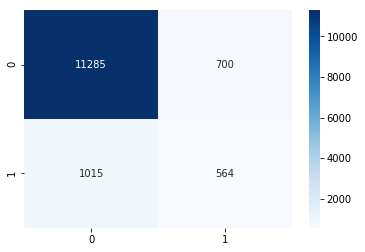

In [63]:
sns.heatmap(confusion_matrix(Y_test,Naive_predictions), annot=True, cmap='Blues',fmt='g')

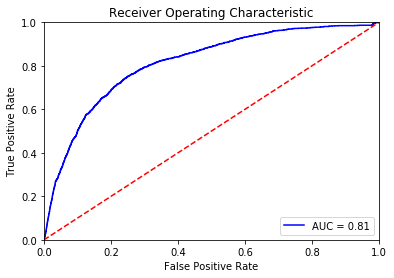

In [64]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = Naive_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
Naive_Accuracy = accuracy_score(Y_test,Naive_predictions)
Naive_Accuracy

0.8735623709820112

In [66]:
Naive_Gini = 2*roc_auc - 1
Naive_Gini

0.6277229585324486

In [67]:
Naive_AUC = roc_auc
Naive_AUC

0.8138614792662243

In [68]:
KNN = KNeighborsClassifier(n_neighbors=5,p=2)
KNN_model = KNN.fit(X_train,Y_train)
KNN_predictions = KNN_model.predict(X_test)
KNN_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
print(classification_report(Y_test,KNN_predictions))

             precision    recall  f1-score   support

          0       0.91      0.96      0.93     11985
          1       0.48      0.28      0.35      1579

avg / total       0.86      0.88      0.87     13564



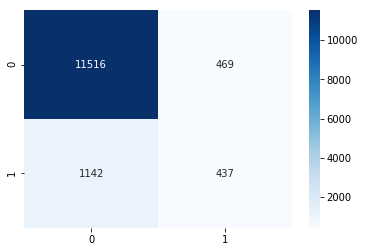

In [70]:
sns.heatmap(confusion_matrix(Y_test,KNN_predictions), annot=True, cmap='Blues',fmt='g')

In [71]:
KNN_Accuracy = accuracy_score(Y_test,KNN_predictions)
KNN_Accuracy

0.8812297257446181

In [72]:
KNN_Gini = 2*roc_auc - 1
KNN_Gini

0.6277229585324486

In [73]:
KNN_AUC = roc_auc
KNN_AUC

0.8138614792662243

Comparison of base models

In [74]:
Compare = [[Logistic_Accuracy,Logistic_Gini,Logistic_AUC],
           [Naive_Accuracy,Naive_Gini,Naive_AUC],[KNN_Accuracy,KNN_Gini,KNN_AUC]]

In [75]:
Compare_Models = pd.DataFrame(Compare, columns= ['Accuracy','Gini Index', 'AUC'], index=['Logistic','Naive','KNN'])
Compare_Models

,Accuracy,Gini Index,AUC
Logistic,0.886833,0.717730,0.858865
Naive,0.873562,0.627723,0.813861
KNN,0.881230,0.627723,0.813861


From the above table, observed that all scores are high for Logistic Regression Model.

Ensemble Models

In [76]:
#Ensemble Learning - Bagging
target_labels = df.pop("Target")

In [77]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True)

bgcl = bgcl.fit(df, target_labels)
print(bgcl.oob_score_)

0.8896507487115968


In [79]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [80]:
#Ensemble Learning - AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(X_train, Y_train)

In [96]:
test_pred = abcl.predict(X_test)
AdaB_Accuracy = abcl.score(X_test , Y_test)
AdaB_Accuracy

0.8490858153936892

In [97]:
AdaB_Gini = 2*roc_auc - 1
AdaB_Gini

0.6277229585324486

In [98]:
AdaB_auc = roc_auc
AdaB_auc

0.8138614792662243

In [99]:
#Ensemble RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 6)
rfcl = rfcl.fit(X_train, Y_train)

In [100]:
test_pred = rfcl.predict(X_test)
RFC_Accuracy = rfcl.score(X_test , Y_test)
RFC_Accuracy 

0.8837363609554704

In [101]:
RFC_Gini = 2*roc_auc - 1
RFC_Gini

0.6277229585324486

In [102]:
RFC_auc = roc_auc
RFC_auc

0.8138614792662243

In [105]:
Compare = [[Logistic_Accuracy,Logistic_Gini,Logistic_AUC],
           [Naive_Accuracy,Naive_Gini,Naive_AUC],[KNN_Accuracy,KNN_Gini,KNN_AUC], [bgcl.oob_score_, ], [AdaB_Accuracy, AdaB_Gini, AdaB_auc], [RFC_Accuracy, RFC_Gini, RFC_auc]]

In [106]:
Compare_Models = pd.DataFrame(Compare, columns= ['Accuracy','Gini Index', 'AUC'], index=['Logistic','Naive','KNN', 'Bagging', 'AdaBoost', 'RandomForest'])
Compare_Models

,Accuracy,Gini Index,AUC
Logistic,0.886833,0.717730,0.858865
Naive,0.873562,0.627723,0.813861
KNN,0.881230,0.627723,0.813861
Bagging,0.889651,NaN,NaN
AdaBoost,0.849086,0.627723,0.813861
RandomForest,0.883736,0.627723,0.813861


From the above comparison of base models & ensemble models, observed that Bagging & Logistic regression models are performing well in comparison to other models